<a href="https://colab.research.google.com/github/maya034/Telecom-Churn-Analysis/blob/main/Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

STATE: 51 Unique States

Account Length. Length of The Account

Area Code 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland

International Plan Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

Voice Mail Plan Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

Number vmail messages Number of Voice Mail Messages ranging from 0 to 50

Total day minutes Total Number of Minutes Spent By Customers in Morning

Total day calls Total Number of Calls made by Customer in Morning.

Total day charge Total Charge to the Customers in Morning.

Total eve minutesTotal Number of Minutes Spent By Customers in Evening

Total eve calls Total Number of Calls made by Customer in Evening.

Total eve charge Total Charge to the Customers in Morning.

Total night minutes Total Number of Minutes Spent By Customers in the Night.

Total night calls Total Number of Calls made by Customer in Night.

Total night charge Total Charge to the Customers in Night. 

## New Section

In [43]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
working_path='/content/drive/MyDrive/Colab Notebooks/Telecom Churn.csv'
df=pd.read_csv(working_path)

In [46]:
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [48]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [49]:
df[['State','Churn']]

,State,Churn
0,KS,False
1,OH,False
2,NJ,False
3,OH,False
4,OK,False
...,...,...
3328,AZ,False
3329,WV,False
3330,RI,False
3331,CT,False


In [50]:
df.groupby('State')['Churn'].value_counts().sort_values(ascending=True)

State  Churn
AK     True      3
IA     True      3
HI     True      3
LA     True      4
AZ     True      4
                ..
MN     False    69
WI     False    71
AL     False    72
VA     False    72
WV     False    96
Name: Churn, Length: 102, dtype: int64

In [51]:
s=df[df['Churn']==True]

In [52]:
st=pd.DataFrame(s)

In [53]:
st

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [54]:
len(set(list(df['State'])))

51

In [55]:
df['State'].nunique()

51

In [56]:
df['Area code'].nunique()

3

In [57]:
df['Area code'].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

In [58]:
df.groupby('Area code')['State'].value_counts(normalize=True)

Area code  State
408        AL       0.029833
           CO       0.029833
           NC       0.029833
           NH       0.029833
           VA       0.029833
                      ...   
510        LA       0.013095
           MO       0.013095
           NM       0.013095
           CA       0.011905
           HI       0.009524
Name: State, Length: 153, dtype: float64

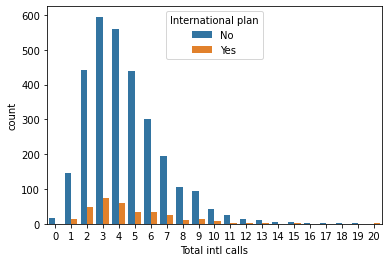

In [59]:
#pd.crosstab(df['Total intl calls'],df['Churn'],margins=True).plot(kind='bar')
sns.countplot(x = 'Total intl calls', hue = 'International plan', data = df)


#pd.crosstab(df['Total intl calls'],df['State'],normalize='index').plot(kind='bar')

In [60]:
df.duplicated().sum()

0

In [61]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [62]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [63]:
a=df['Total intl minutes'].describe()

In [64]:
b=df['Total intl calls'].describe()

In [65]:
c=df['Total intl charge'].describe()

In [66]:
intl_call=pd.DataFrame(a,b,c).reset_index

In [67]:
df_=df[['Total intl minutes','Total intl calls','Total intl charge','Churn']]

In [68]:
df_.set_index('Churn')

,Total intl minutes,Total intl calls,Total intl charge
Churn,,,
False,10.0,3,2.70
False,13.7,3,3.70
False,12.2,5,3.29
False,6.6,7,1.78
False,10.1,3,2.73
...,...,...,...
False,9.9,6,2.67
False,9.6,4,2.59
False,14.1,6,3.81


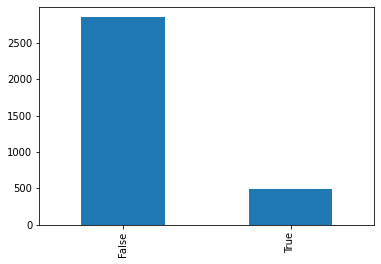

In [69]:

df['Churn'].value_counts().plot(kind='bar')



In [70]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [71]:
s.groupby(['Churn','State','Area code'])['Total intl calls'].value_counts()

Churn  State  Area code  Total intl calls
True   AK     415        1                   1
                         2                   1
                         3                   1
       AL     408        3                   1
                         4                   1
                                            ..
       WY     415        7                   1
              510        2                   1
                         3                   1
                         5                   1
                         10                  1
Name: Total intl calls, Length: 367, dtype: int64

In [72]:
s.groupby(['Churn'])['Total intl calls'].value_counts().sort_values(ascending=False)

Churn  Total intl calls
True   2                   108
       3                    98
       4                    79
       5                    53
       6                    43
       1                    31
       7                    27
       9                    14
       8                    11
       10                    8
       11                    4
       15                    3
       20                    1
       14                    1
       13                    1
       12                    1
Name: Total intl calls, dtype: int64

In [73]:
s.groupby(['Churn'])['Total intl minutes'].value_counts().sort_values(ascending=False)

Churn  Total intl minutes
True   13.9                  11
       8.8                   10
       10.3                  10
       11.0                  10
       11.1                  10
                             ..
       4.3                    1
       4.2                    1
       3.9                    1
       2.0                    1
       20.0                   1
Name: Total intl minutes, Length: 119, dtype: int64

In [74]:
t=df[df['Churn']==False]

In [75]:
t.groupby(['Churn'])['Total intl calls'].value_counts().sort_values(ascending=False)

Churn  Total intl calls
False  3                   570
       4                   540
       5                   419
       2                   381
       6                   293
       7                   191
       1                   129
       8                   105
       9                    95
       10                   42
       11                   24
       0                    18
       12                   14
       13                   13
       14                    5
       15                    4
       18                    3
       16                    2
       17                    1
       19                    1
Name: Total intl calls, dtype: int64

In [76]:
t.groupby(['Churn'])['Total intl minutes'].value_counts().sort_values(ascending=False)

Churn  Total intl minutes
False  10.0                  55
       11.3                  52
       9.8                   51
       10.6                  49
       10.2                  48
                             ..
       2.2                    1
       2.0                    1
       1.3                    1
       1.1                    1
       18.9                   1
Name: Total intl minutes, Length: 159, dtype: int64

### Total intl minutes

In [77]:
print(df['Total intl minutes'].max())
print(round(df['Total intl minutes'].max()/60))  #in hours
print(df['Total intl minutes'].min())
print(df['Total intl minutes'].mean())

20.0
0
0.0
10.237293729372933


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


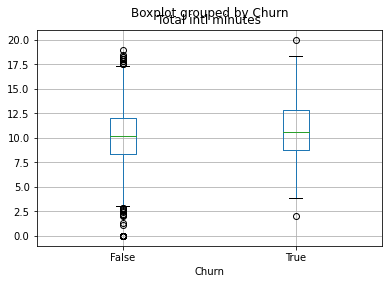

In [78]:
plt.show()
df.boxplot(column='Total intl minutes', by='Churn')


## Total intl calls

In [79]:
print(df['Total intl calls'].max())
print(df['Total intl calls'].min())
print(df['Total intl calls'].mean())

20
0
4.4794479447944795


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


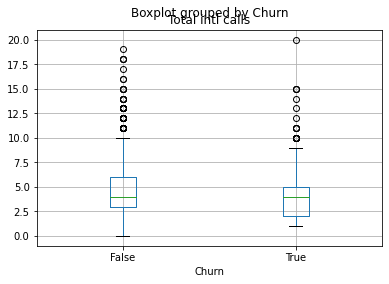

In [80]:
plt.show()
df.boxplot(column='Total intl calls', by='Churn')

In [81]:
s['International plan'].value_counts()

No     346
Yes    137
Name: International plan, dtype: int64

In [ ]:
 clients with no International Plan will have to pay more and they might leave this operator.


### Total intl charge

In [83]:
print(df['Total intl charge'].max())
print(df['Total intl charge'].min())
print(df['Total intl charge'].mean())

5.4
0.0
2.764581458145804


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


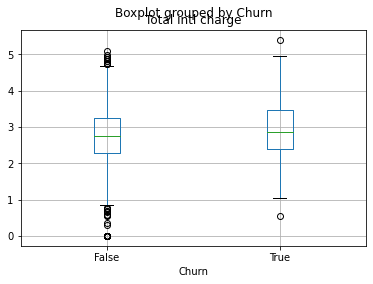

In [84]:
plt.show()
df.boxplot(column='Total intl charge', by='Churn')

In [85]:
t.max()

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         315.6
Total day calls             163
Total day charge          53.65
Total eve minutes         361.8
Total eve calls             170
Total eve charge          30.75
Total night minutes         395
Total night calls           175
Total night charge        17.77
Total intl minutes         18.9
Total intl calls             19
Total intl charge           5.1
Customer service calls        8
Churn                     False
dtype: object

##  Call Rate and better Pricing Strategy  Optimization would lead to lower churn rate

In [86]:
c=pd.crosstab(df['Churn'],df['Number vmail messages'], margins = True)


In [87]:
pd.crosstab(df['Number vmail messages'],df['Voice mail plan'], margins = True)

Voice mail plan,No,Yes,All
Number vmail messages,,,
0,2411,0,2411
4,0,1,1
8,0,2,2
9,0,2,2
10,0,1,1
11,0,2,2
12,0,6,6
13,0,4,4
14,0,7,7


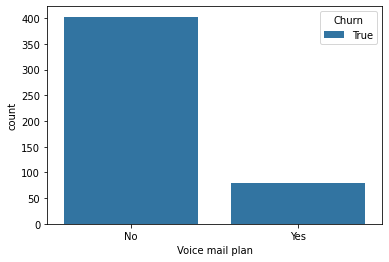

In [88]:
sns.countplot(x = 'Voice mail plan', hue = 'Churn', data = s)

In [89]:
s['Voice mail plan'].value_counts()

No     403
Yes     80
Name: Voice mail plan, dtype: int64

In [90]:
s.groupby('Voice mail plan')['Churn'].value_counts()

Voice mail plan  Churn
No               True     403
Yes              True      80
Name: Churn, dtype: int64

In [91]:
s['Number vmail messages'].mean()

5.115942028985507

In [92]:
s[['Voice mail plan']]

,Voice mail plan
10,No
15,No
21,No
33,No
41,Yes
...,...
3301,No
3304,No
3320,No
3322,No


In [93]:
day_df = df[['Total intl calls','Churn']]

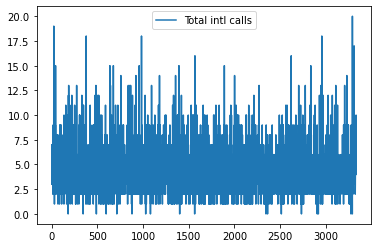

In [94]:
day_df.plot()

In [95]:
s

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [96]:
df['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [97]:
a=df[df['State']=='KS']

In [98]:
s[s['State']=='KS']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
258,KS,92,408,Yes,No,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True
430,KS,46,510,No,No,0,250.3,100,42.55,260.6,90,22.15,195.0,104,8.78,13.3,2,3.59,2,True
619,KS,110,415,Yes,No,0,293.3,79,49.86,188.5,90,16.02,266.9,91,12.01,14.5,4,3.92,0,True
987,KS,110,415,Yes,Yes,27,267.9,103,45.54,263.3,74,22.38,178.1,106,8.01,8.3,2,2.24,1,True
1155,KS,167,415,No,No,0,131.6,120,22.37,211.3,96,17.96,168.3,97,7.57,11.1,4,3.00,4,True
1232,KS,24,510,No,No,0,243.0,91,41.31,183.9,77,15.63,184.3,109,8.29,15.3,6,4.13,0,True
1334,KS,126,408,No,No,0,321.3,99,54.62,167.9,93,14.27,193.6,106,8.71,8.0,4,2.16,1,True
1593,KS,105,415,Yes,No,0,273.9,119,46.56,278.6,103,23.68,255.3,90,11.49,10.9,7,2.94,1,True
2059,KS,94,408,No,No,0,269.2,104,45.76,193.8,144,16.47,257.6,61,11.59,8.9,2,2.40,3,True
2173,KS,47,510,Yes,No,0,47.8,120,8.13,178.9,123,15.21,152.6,96,6.87,13.3,7,3.59,0,True


In [99]:
t[t['State']=='KS']

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
179,KS,70,408,No,No,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,False
287,KS,137,408,No,No,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,False
368,KS,132,415,No,No,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,False
379,KS,127,415,No,No,0,221.0,100,37.57,160.7,113,13.66,233.1,96,10.49,6.8,4,1.84,2,False
385,KS,137,415,No,No,0,230.2,113,39.13,220.4,79,18.73,204.7,111,9.21,10.7,7,2.89,4,False
451,KS,86,408,No,Yes,23,225.5,107,38.34,246.3,105,20.94,245.7,81,11.06,9.8,2,2.65,0,False
508,KS,143,408,No,Yes,24,186.6,69,31.72,222.0,116,18.87,234.9,138,10.57,11.6,5,3.13,1,False
620,KS,163,415,No,No,0,191.3,89,32.52,193.9,87,16.48,268.4,121,12.08,12.8,4,3.46,1,False
636,KS,121,408,No,No,0,150.7,105,25.62,197.3,133,16.77,169.0,116,7.61,9.2,15,2.48,1,False


In [100]:
a

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
179,KS,70,408,No,No,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,False
258,KS,92,408,Yes,No,0,62.6,111,10.64,180.6,126,15.35,221.7,80,9.98,10.4,2,2.81,1,True
287,KS,137,408,No,No,0,205.9,88,35.00,209.3,86,17.79,289.9,84,13.05,14.5,4,3.92,2,False
368,KS,132,415,No,No,0,83.4,110,14.18,232.2,137,19.74,146.7,114,6.60,7.6,5,2.05,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,KS,164,510,No,Yes,30,238.8,100,40.60,230.0,121,19.55,206.3,66,9.28,13.2,8,3.56,1,False
3244,KS,101,415,No,No,0,231.3,87,39.32,224.7,88,19.10,214.6,69,9.66,7.2,7,1.94,1,False
3253,KS,127,415,No,Yes,24,154.8,69,26.32,177.2,105,15.06,207.6,102,9.34,9.0,4,2.43,1,False
3285,KS,57,415,No,No,0,158.1,117,26.88,115.2,149,9.79,182.4,92,8.21,11.8,7,3.19,0,False


In [101]:
df.groupby('State')['Churn'].value_counts()

State  Churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: Churn, Length: 102, dtype: int64

In [102]:
df[['State','Churn']]

,State,Churn
0,KS,False
1,OH,False
2,NJ,False
3,OH,False
4,OK,False
...,...,...
3328,AZ,False
3329,WV,False
3330,RI,False
3331,CT,False


In [103]:
s[['Total day minutes','Total eve minutes','Total night minutes']].describe()

,Total day minutes,Total eve minutes,Total night minutes
count,483.000000,483.000000,483.000000
mean,206.914079,212.410145,205.231677
std,68.997792,51.728910,47.132825
min,0.000000,70.900000,47.400000
25%,153.250000,177.100000,171.250000
50%,217.600000,211.300000,204.800000
75%,265.950000,249.450000,239.850000
max,350.800000,363.700000,354.900000


In [104]:
s['Total day minutes'].value_counts()

133.3    2
157.8    2
278.0    2
271.1    2
145.0    2
        ..
226.3    1
229.7    1
261.4    1
158.4    1
151.0    1
Name: Total day minutes, Length: 446, dtype: int64

In [105]:
t['Total day minutes'].value_counts()

174.5    8
159.5    7
175.4    7
183.4    7
206.2    6
        ..
124.9    1
154.7    1
260.5    1
165.8    1
74.3     1
Name: Total day minutes, Length: 1478, dtype: int64

In [106]:
t[['Total day minutes','Total eve minutes','Total night minutes']].describe()

,Total day minutes,Total eve minutes,Total night minutes
count,2850.000000,2850.000000,2850.000000
mean,175.175754,199.043298,200.133193
std,50.181655,50.292175,51.105032
min,0.000000,0.000000,23.200000
25%,142.825000,164.500000,165.900000
50%,177.200000,199.600000,200.250000
75%,210.300000,233.200000,234.900000
max,315.600000,361.800000,395.000000


In [107]:
s[['Voice mail plan','Number vmail messages']].describe()

,Number vmail messages
count,483.000000
mean,5.115942
std,11.860138
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,48.000000


In [108]:
t[['Voice mail plan','Number vmail messages']].describe()

,Number vmail messages
count,2850.000000
mean,8.604561
std,13.913125
min,0.000000
25%,0.000000
50%,0.000000
75%,22.000000
max,51.000000


In [109]:
u=pd.DataFrame(s.groupby('State')['Churn'].value_counts())

In [110]:
u['Churn'].sort_values()


State  Churn
AK     True      3
IA     True      3
HI     True      3
AZ     True      4
LA     True      4
NE     True      5
VA     True      5
TN     True      5
DC     True      5
IL     True      5
NM     True      6
RI     True      6
ND     True      6
WI     True      7
MO     True      7
AL     True      8
GA     True      8
PA     True      8
KY     True      8
FL     True      8
SD     True      8
VT     True      8
OK     True      9
NH     True      9
WY     True      9
CA     True      9
CO     True      9
DE     True      9
ID     True      9
IN     True      9
WV     True     10
UT     True     10
OH     True     10
AR     True     11
OR     True     11
MA     True     11
NC     True     11
CT     True     12
KS     True     13
ME     True     13
NV     True     14
SC     True     14
WA     True     14
MT     True     14
MS     True     14
MN     True     15
NY     True     15
MI     True     16
MD     True     17
NJ     True     18
TX     True     18
Name: Churn, dtype

In [111]:
v=pd.DataFrame(t.groupby('State')['Churn'].value_counts())

In [112]:
v.rename({' Churn':'Churn1'})

,,Churn
State,Churn,
AK,False,49
AL,False,72
AR,False,44
AZ,False,60
CA,False,25
CO,False,57
CT,False,62
DC,False,49
DE,False,52


In [113]:
v['Churn'].sort_values()

State  Churn
CA     False    25
PA     False    37
IA     False    41
AR     False    44
SC     False    46
GA     False    46
NH     False    47
LA     False    47
TN     False    48
AK     False    49
DC     False    49
ME     False    49
NJ     False    50
HI     False    50
KY     False    51
MS     False    51
NV     False    52
WA     False    52
SD     False    52
OK     False    52
DE     False    52
IL     False    53
MD     False    53
MA     False    54
TX     False    54
MT     False    54
FL     False    55
MO     False    56
ND     False    56
NE     False    56
NM     False    56
CO     False    57
KS     False    57
NC     False    57
MI     False    57
RI     False    59
AZ     False    60
IN     False    62
UT     False    62
CT     False    62
ID     False    64
VT     False    65
OR     False    67
WY     False    68
OH     False    68
NY     False    68
MN     False    69
WI     False    71
VA     False    72
AL     False    72
WV     False    96
Name: Churn, dtype

In [114]:
vnt=s[df['Voice mail plan']=='No']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [115]:
vyf=t[df['Voice mail plan']=='No']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [116]:
vnt['Number vmail messages'].sort_values(ascending=False)

3323    0
1346    0
1302    0
1306    0
1310    0
       ..
2388    0
2389    0
2397    0
2401    0
10      0
Name: Number vmail messages, Length: 403, dtype: int64

In [117]:
df[['Voice mail plan','Number vmail messages']]

,Voice mail plan,Number vmail messages
0,Yes,25
1,Yes,26
2,No,0
3,No,0
4,No,0
...,...,...
3328,Yes,36
3329,No,0
3330,No,0
3331,No,0


In [118]:
df['Account length'].mean()

101.06480648064806

In [119]:
t['Account length'].mean()

100.79368421052632

In [120]:
s

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [121]:
s[s['Customer service calls']>3]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
48,ID,119,415,No,No,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5,True
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,KS,170,415,No,Yes,42,199.5,119,33.92,135.0,90,11.48,184.6,49,8.31,10.9,3,2.94,4,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [122]:
s.groupby(['Voice mail plan','State'])['Customer service calls'].value_counts()

Voice mail plan  State  Customer service calls
No               AK     1                         1
                        4                         1
                        5                         1
                 AL     1                         2
                        5                         2
                                                 ..
Yes              WA     4                         1
                 WI     5                         1
                 WV     1                         1
                        4                         1
                 WY     1                         1
Name: Customer service calls, Length: 300, dtype: int64

In [123]:
s.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True


In [124]:
true_churner=pd.DataFrame(s[['Total day minutes','Total eve minutes','Total night minutes']])

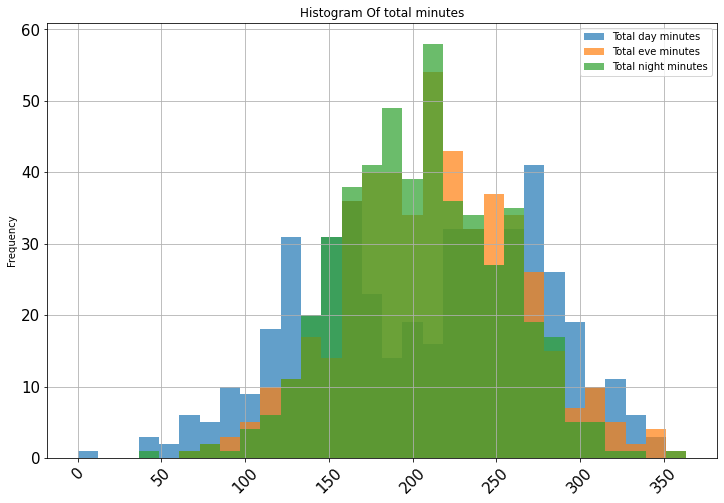

In [125]:

true_churner.plot(kind='hist',
        alpha=0.7,
        bins=30,
        title='Histogram Of total minutes',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15)


In [126]:
loyal=pd.DataFrame(t[['Total day minutes','Total eve minutes','Total night minutes']])

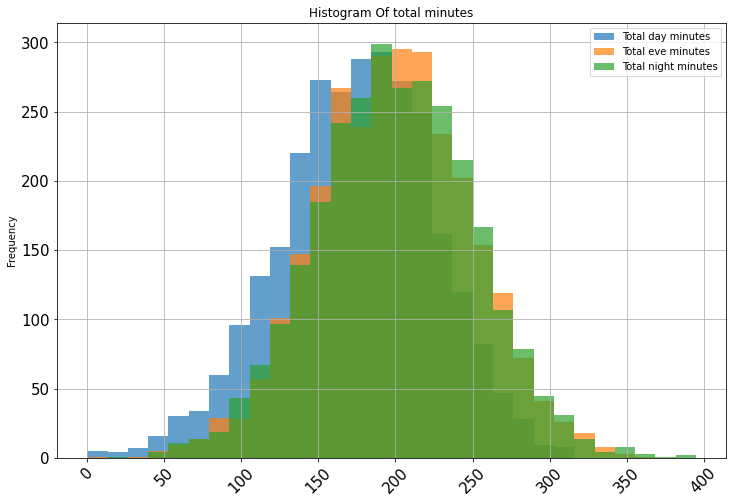

In [127]:

loyal.plot(kind='hist',
        alpha=0.7,
        bins=30,
        title='Histogram Of total minutes',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7743963a50>,
      dtype=object)

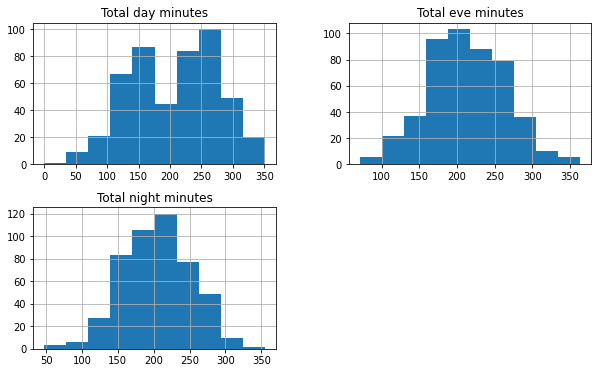

In [128]:
s.hist(column=['Total day minutes','Total eve minutes','Total night minutes'],figsize=[10, 6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7743654c90>,
      dtype=object)

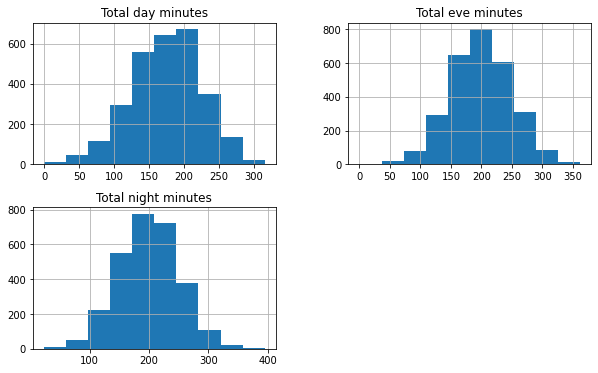

In [129]:
t.hist(column=['Total day minutes','Total eve minutes','Total night minutes'],figsize=[10, 6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7743519090>,
      dtype=object)

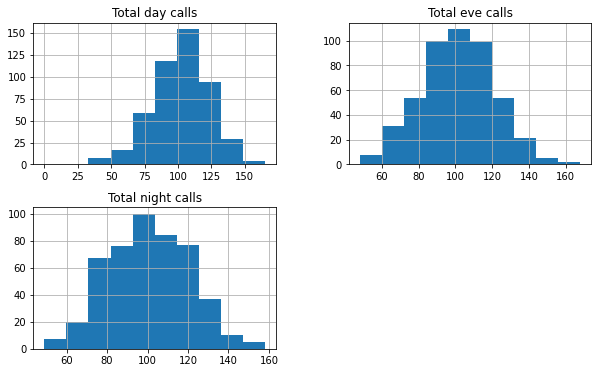

In [130]:
s.hist(column=['Total day calls','Total eve calls','Total night calls'],figsize=[10, 6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f774330b610>,
      dtype=object)

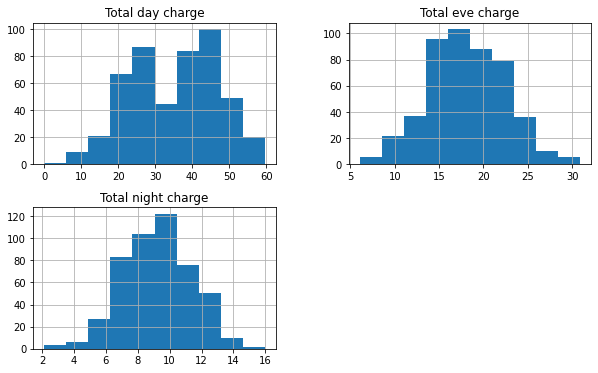

In [131]:
s.hist(column=['Total day charge','Total eve charge','Total night charge'],figsize=[10, 6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77431c5f90>,
      dtype=object)

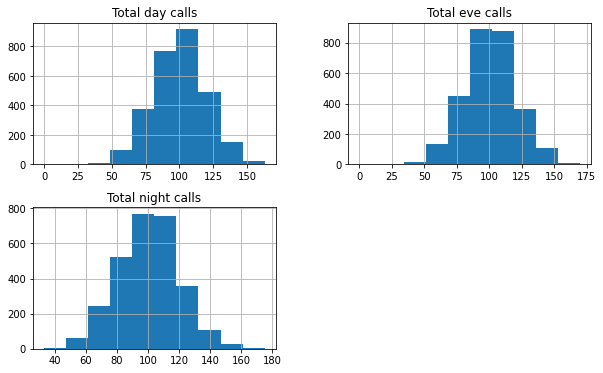

In [132]:
t.hist(column=['Total day calls','Total eve calls','Total night calls'],figsize=[10, 6])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f774362a690>,
      dtype=object)

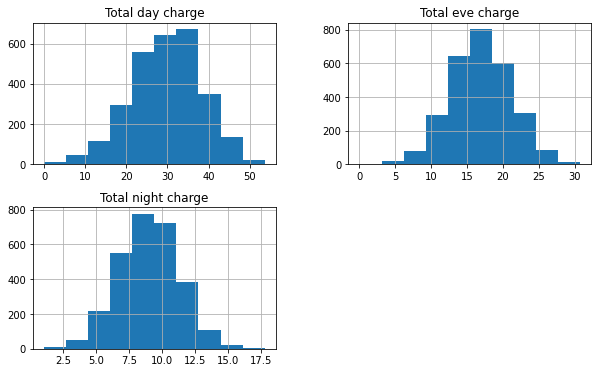

In [133]:
t.hist(column=['Total day charge','Total eve charge','Total night charge'],figsize=[10, 6])

In [134]:
s

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7742d257d0>,
      dtype=object)

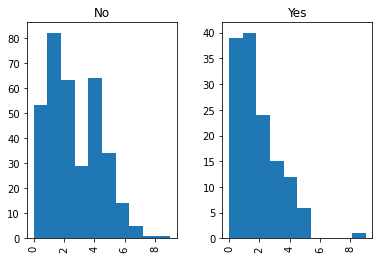

In [135]:
s.hist(column='Customer service calls', by='International plan')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7742c4c150>,
      dtype=object)

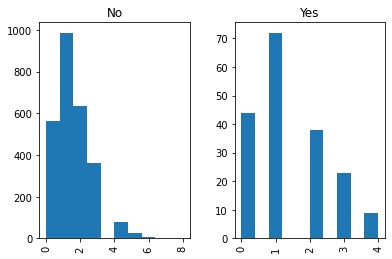

In [136]:
t.hist(column='Customer service calls', by='International plan')

In [137]:
pd.crosstab(df['Customer service calls'], df['Churn'], normalize='index')

Churn,False,True
Customer service calls,,
0,0.868006,0.131994
1,0.896698,0.103302
2,0.885375,0.114625
3,0.897436,0.102564
4,0.542169,0.457831
5,0.393939,0.606061
6,0.363636,0.636364
7,0.444444,0.555556
8,0.500000,0.500000


In [138]:
s[s['Number vmail messages']>30].value_counts()

State  Account length  Area code  International plan  Voice mail plan  Number vmail messages  Total day minutes  Total day calls  Total day charge  Total eve minutes  Total eve calls  Total eve charge  Total night minutes  Total night calls  Total night charge  Total intl minutes  Total intl calls  Total intl charge  Customer service calls  Churn
WV     152             510        Yes                 Yes              41                     146.8              128              24.96             285.6              96               24.28             213.6                80                 9.61                4.3                 2                 1.16               1                       True     1
ME     36              510        Yes                 Yes              42                     196.8              89               33.46             254.9              122              21.67             138.3                126                6.22                20.0                6              

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


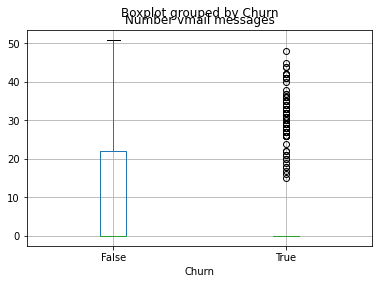

In [139]:
plt.show()
df.boxplot(column='Number vmail messages', by='Churn')

We can Notice for Voice-Mail Feature when there are more than 20 voice-mail messages then certainly there is a churn indicating improving the voice-mail feature or setting a limit and check whether a customer is retianed.
According to my hypothesis :
*1.Voice-Mail Service Upgradation 2.Setting up a limit on Voice-Mail service strictly no more than 25 voice mails. 3.Quality Drop in Voice-Mail after 25 voice mails.**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


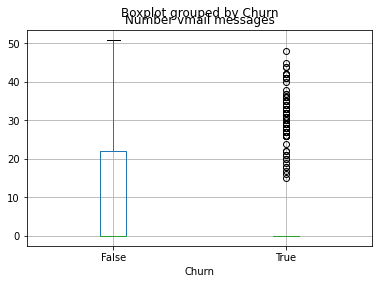

In [140]:
df.boxplot(column='Number vmail messages', by='Churn')

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: ignored

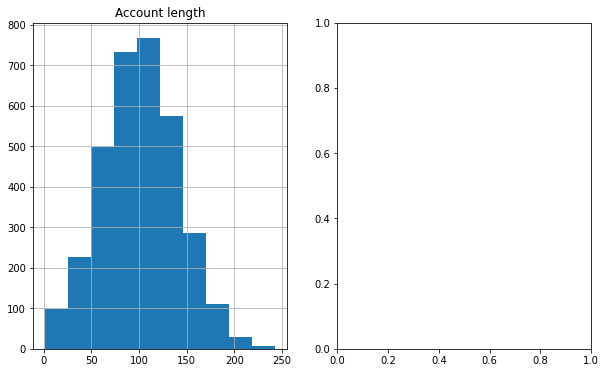

In [142]:
df.hist(column=['Account length','Churn'],figsize=[10, 6])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


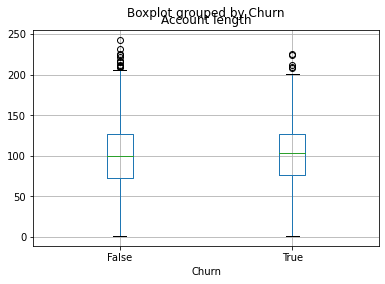

In [143]:
df.boxplot(column='Account length', by='Churn')

In [144]:
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


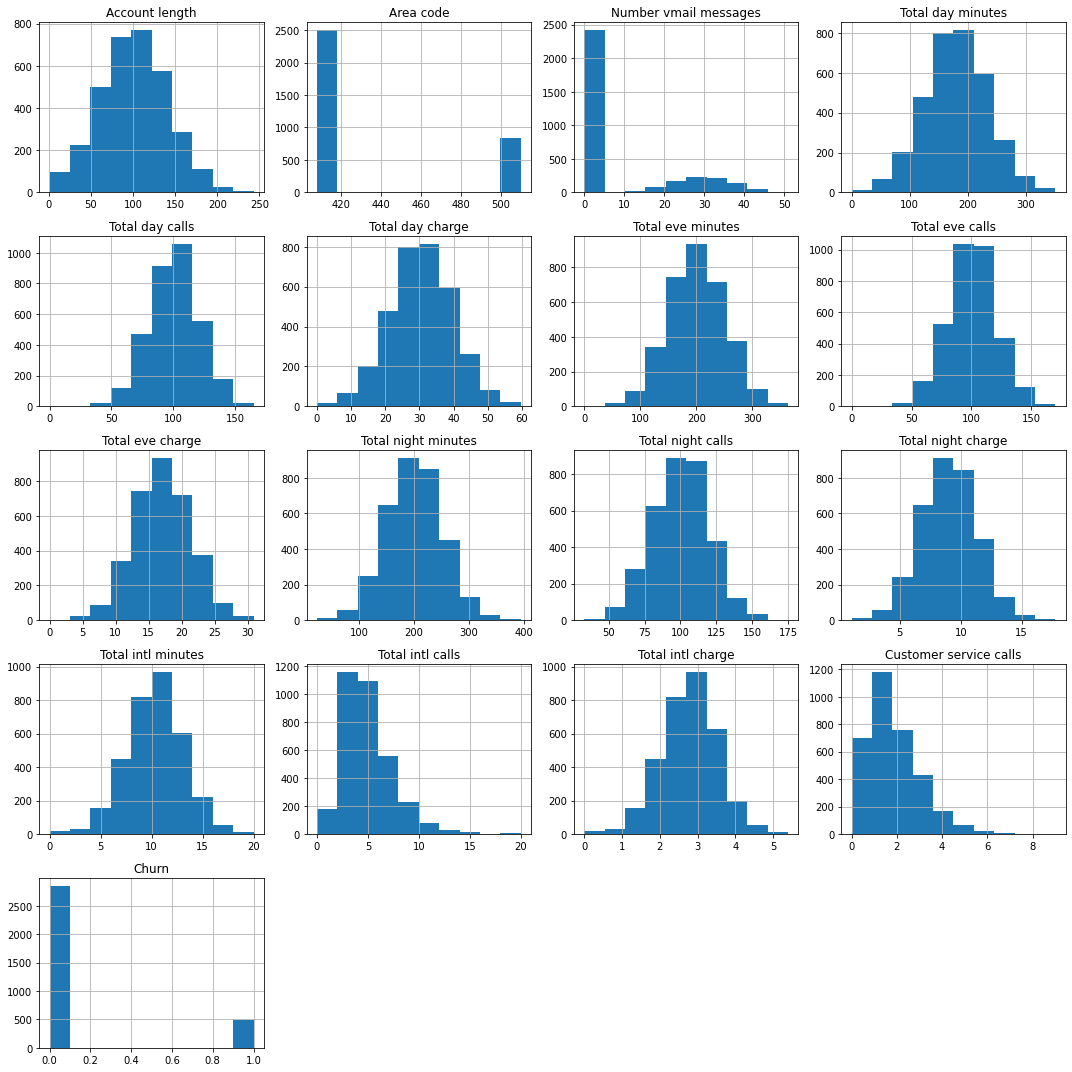

In [145]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout();

when there are more than 20 voice-mail messages then we get a chunk of people  indicating churn .Improving the voice-mail feature or setting a limit can improve.
According to my hypothesis :
*1.Voice-Mail Service Upgradation 2.Setting up a limit on Voice-Mail service strictly no more than 25 voice mails. 3.Quality Drop in Voice-Mail after 25 voice mails.**


In [147]:
df.shape


(3333, 20)